In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import random
import seaborn as sns
sns.set()
%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.models import HoverTool

## well_bore with casing and leak off test

In [40]:
def read_in():
    '''
    read in files  with pd
    
    Return:
        dataframes
    '''
    result = pd.DataFrame()
    base_dir = './102-Norway_NPD/2-Well Info-Table'
    lot_name = 'wellbore_with_casing_and_leak-off-tests.xlsx'
    well_bore_de = 'wellbore_development_all.xlsx'
    well_bore_exp = 'wellbore_exploration_all.xlsx'

    lot_dir= os.path.join(base_dir,lot_name)
    lat_long_de = os.path.join(base_dir,well_bore_de)
    lat_long_exp = os.path.join(base_dir,well_bore_exp)

    lot_df = pd.read_excel(lot_dir)
    lat_long_df0 = pd.read_excel(lat_long_de)
    lat_long_df1 = pd.read_excel(lat_long_exp)
    
    lat_long_df = pd.concat([lat_long_df0,lat_long_df1])
    result = pd.merge(lot_df,lat_long_df,how='left',on='NPDID wellbore')
    
    return result

## accroding to the result statistics, divided LOT to 4 categories,
- 185- 998m, 
- 998-1695.75
- 1694.75-2629.75,
- \> 6675.00



In [135]:
def get_date_cat(df,bin_):
    '''
    retrieve data with bin_
    
    Args:
        df: A dataframe;
        bin_:A number range list
    Returns:
        A dataframe with such bin_ masked dataframe for ploting
    
    Raises:
        KeyError: An key error occurred accessing the df
    
    '''
    cri_col = 'Casing depth [m]'## name of column for slicing
    bin_df = pd.DataFrame() ## dataframe for saving df
    try:
        bin_mask = (df[cri_col] >bin_[0]) & (df[cri_col] <bin_[-1]) ## mask of dataframe
        bin_df = df[bin_mask] ## get desired dataframe
    except KeyError as e:
        print('KeyError',e)
    
    return bin_df
    
    
    

In [136]:
def plot_fre(bin_df,bin_):
    '''
    plot frequency data plot
    
    Args:
        bin_df: A dataframe;
    Returns:
        A matplotlib axes
    Raises:
        KeyError: An key error occurred accessing the df
    '''
    plot_x = 'Casing depth [m]' ## x col name
    plot_y = 'LOT mud eqv. [g/cm3]' ## y col name
    title ='Depth vs LOT mud eqv'
#     depth_range =  np.array([math.floor(x) for x in range(int(bin_[0]),int(bin_[-1]),)])
    
    try:
        ser_x = bin_df[plot_x].values
        ser_y = bin_df[plot_y].values
#         bin_df['gradient'] = bin_df[plot_y] / bin_df[plot_x]
#         min_gradient = bin_df[['gradient']].describe().T['25%'][0] ## 25% value
#         max_gradient = bin_df[['gradient']].describe().T['75%'][0]## 75% value
#         ser_min = depth_range * min_gradient ## get bottom line of density/depth
#         ser_max = depth_range * max_gradient ## get maximum line of density/depth
        
        # plot data    
        fig,ax = plt.subplots(figsize=(12,8))
        ax.scatter(ser_x,ser_y)
        ax.set(xlabel = plot_x,ylabel = plot_y,title =title)
#         ax.plot(ser_x,ser_min) ##plot bottom line
#         ax.plot(ser_x,ser_max) ## maximum top line
        ax.grid(True)
    except KeyError as e:
        print('KeyError',e)

    
    return ax
    
    

In [145]:
def show_frequency():
    '''
    get frequency plot for each bin
    return ax list
    
    '''
    ## seperate bins
    bins =[[185,998],[998,1694.75],[1694.75,2629.75],[2629.75,6675.05]]
    ax_bins = [] ## bins for saving axes
    result = read_in() ## read in data
    for bin_ in bins:
        ## get desired data
        bin_df = get_date_cat(result,bin_)
        ## plot 
        ax = plot_fre(bin_df,bin_)
#         ax.figure
        ax_bins.append(ax)
    return ax_bins

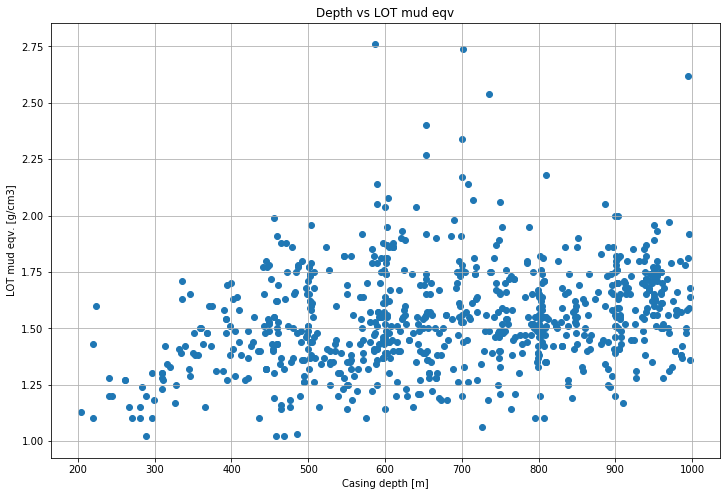

In [154]:
axes[0].figure

In [150]:
## get different casing type_depth
caseing_groups = result.groupby(['NPDID wellbore']).groups  ## return a dict,value is index list

In [255]:
def interactive_plot(df):
    '''
        plot interactive scatter plots
        code source:https://realpython.com/python-data-visualization-bokeh/
    '''
    # Output to file
#     output_file('depth-vs-density.html',
#                 title='depth vs. density')
    
    dict_val_pair ={}
    
    for key,value in dict(df).items():
        dict_val_pair[key] = value.to_list()
        
    chossen_cds = ColumnDataSource(dict_val_pair)
    # Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']
    
    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=600,
                 x_axis_label='well_lat',
                 y_axis_label='well_long',
                 title='well position of lat and long',
                 toolbar_location='below',
                 tools=select_tools)
    ## Create tooltips
    tooltips = [
                ('(NS decimal degrees,EW decimal degrees)', '(@NS decimal degrees,@EW decimal degrees)'),
                ('Casing depth [m]','@Casing depth [m]'),
                ('LOT mud eqv. [g/cm3]', '@LOT mud eqv. [g/cm3]'),
                
               ]
    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))
    
    # Add square representing each well
    fig.square(x='NS decimal degrees',
               y='EW decimal degrees',
               source=chossen_cds,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Visualize
    show(fig)

In [256]:
interactive_plot(result)

In [ ]:
def plot_flow():
    
    '''flow control of interactive plotting
    '''
    col_to_sample = 'NPDID wellbore' ##col name to sample
    lat_col = ['NS decimal degrees'] ##latitude
    long_col = ['EW decimal degrees'] ## longititude 
    
    sampled_df = sample_df(df,n_samples)
    long_lat_ax = plot_long_lat(sampled_df)
    